In [8]:
# Importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
sns.set()

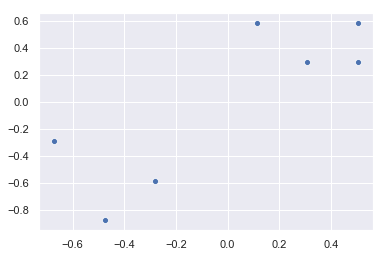

In [18]:
# Making our own dataset
X = np.array([[2, 1], [1, 2], [3, 2], [3, 1], [-1, -2], [-3, -1], [-2, -3]])
# Making sure that the data is zero centered and normalized
X = (X - np.mean(X, axis=0))
X = X/np.var(X, axis=0)
# Plotting the dataset
sns.scatterplot(X[:, 0], X[:, 1])

In [48]:
# Doing a Single Value Decomposition
[U, S, Vt] = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
V = Vt.T

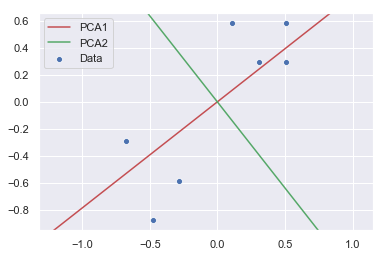

In [49]:
# Visualizing the original Dataset with the two eigen vectors
fig, ax = plt.subplots()
sns.scatterplot(X[:, 0], X[:, 1], ax=ax)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
# Plotting the first eigenvector (Principal Eigen Vector)
ax.plot([-100, 100], [-100 * V[0, 0]/V[1, 0], 100 * V[0, 0]/V[1, 0]], 'r')
# Plotting the second eigenvector (Second Principal Eigen Vector)
ax.plot([-100, 100], [-100 * V[0, 1]/V[1, 1], 100 * V[0, 1]/V[1, 1]], 'g')
ax.axis('equal')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.legend('PCA1,PCA2,Data'.split(','))

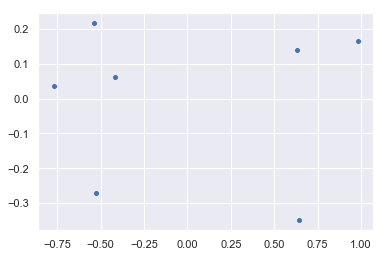

In [54]:
# Projecting the Data onto the new Orthongonal Eigenvectors
Z = X@V
sns.scatterplot(Z[:, 0], Z[:, 1])

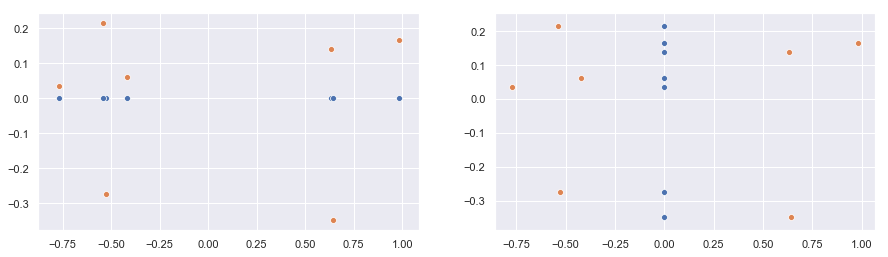

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
# Projected data on First Principal axis
sns.scatterplot(Z[:, 0], [0]*len(Z[:, 0]), ax=ax[0])
# Projected data on Second Principal axis
sns.scatterplot([0]*len(Z[:, 1]), Z[:, 1], ax=ax[1])

# Original Data
sns.scatterplot(Z[:, 0], Z[:, 1], ax=ax[0])
sns.scatterplot(Z[:, 0], Z[:, 1], ax=ax[1])

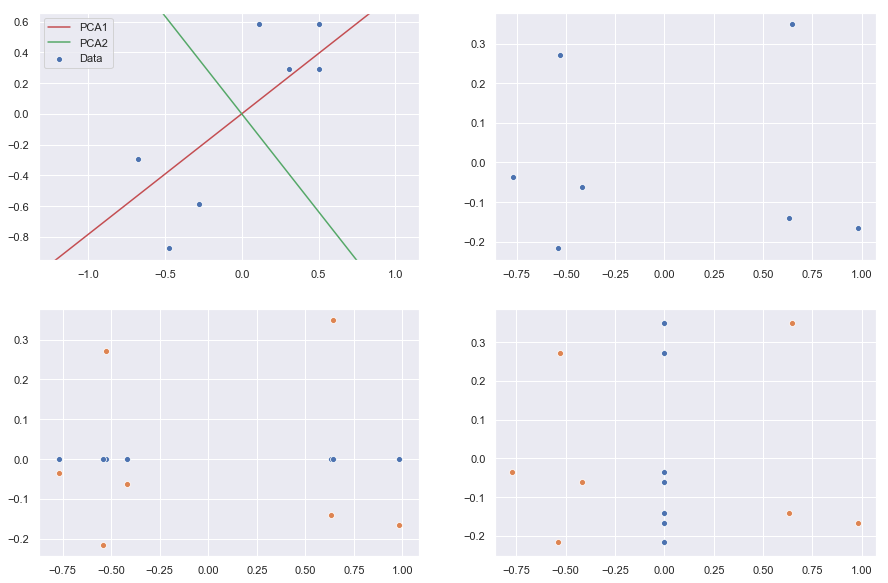

In [74]:
# Finding the PCA projections using the sklearn PCA function
X_pca = PCA().fit(X)
components = X_pca.components_
projections = X_pca.fit_transform(X)
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Original Data with the Components
sns.scatterplot(X[:, 0], X[:, 1], ax=ax[0, 0])
ax0_xlim = ax[0, 0].get_xlim()
ax0_ylim = ax[0, 0].get_ylim()
ax[0, 0].plot([-100, 100], [-100 * components[0, 0]/components[1, 0], 100 * components[0, 0]/components[1, 0]], 'r')
# Plotting the second eigenvector (Second Principal Eigen Vector)
ax[0, 0].plot([-100, 100], [-100 * components[0, 1]/components[1, 1], 100 * components[0, 1]/components[1, 1]], 'g')
ax[0, 0].axis('equal')
ax[0, 0].set_xlim(ax0_xlim)
ax[0, 0].set_ylim(ax0_ylim)
ax[0, 0].legend('PCA1,PCA2,Data'.split(','))

# Plot of the Rotated Data
sns.scatterplot(projections[:, 0], projections[:, 1], ax=ax[0, 1])

# Plotting thr projections
# Projected data on First Principal axis
sns.scatterplot(projections[:, 0], [0]*len(projections[:, 0]), ax=ax[1, 0])
# Projected data on Second Principal axis
sns.scatterplot([0]*len(projections[:, 1]), projections[:, 1], ax=ax[1, 1])

# Original Data
sns.scatterplot(projections[:, 0], projections[:, 1], ax=ax[1, 0])
sns.scatterplot(projections[:, 0], projections[:, 1], ax=ax[1, 1])

In [90]:
# Comparing the variance.
# Explained Variance is given by EigenValues of the first K Components over the Total Sum of Eigen Values
print('PCA Explained Variance:')
print(X_pca.explained_variance_)

print('PCA Explained Variance Ratio:')
print(X_pca.explained_variance_ratio_)

print('Singular Values:')
print(np.diagonal(S))

eigen_vals = np.diagonal(S)**2
print('Eigen Values:')
print(eigen_vals)

print('Explained Variance Ratio Using Eigen Values:')
print(np.array([eigen_vals[0]/sum(eigen_vals), eigen_vals[1]/sum(eigen_vals)]))

print('Explained Variance Ratio Accumulated:')
print(np.array([sum(eigen_vals[:1])/sum(eigen_vals), sum(eigen_vals[:2])/sum(eigen_vals)]))

PCA Explained Variance:
[0.51985001 0.04909443]
PCA Explained Variance Ratio:
[0.91370962 0.08629038]
Singular Values:
[1.76609741 0.54273989]
Eigen Values:
[3.11910008 0.29456659]
Explained Variance Ratio Using Eigen Values:
[0.91370962 0.08629038]
Explained Variance Ratio Accumulated:
[0.91370962 1.        ]


# Another Example

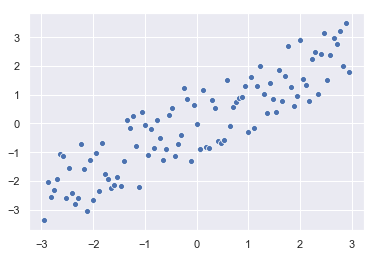

In [93]:
# Making our own dataset
x = np.linspace(-1, 1, 101)
y = x + np.random.rand(x.shape[0])
X = np.array(list(zip(x, y)))
# Making sure that the data is zero centered and normalized
X = (X - np.mean(X, axis=0))
X = X/np.var(X, axis=0)
# Plotting the dataset
sns.scatterplot(X[:, 0], X[:, 1])

In [94]:
# Doing a Single Value Decomposition
[U, S, Vt] = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)
V = Vt.T

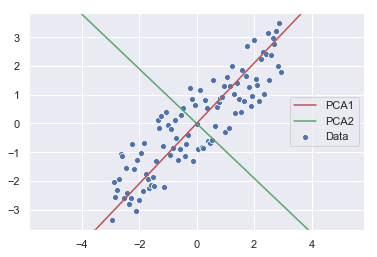

In [95]:
# Visualizing the original Dataset with the two eigen vectors
fig, ax = plt.subplots()
sns.scatterplot(X[:, 0], X[:, 1], ax=ax)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
# Plotting the first eigenvector (Principal Eigen Vector)
ax.plot([-100, 100], [-100 * V[0, 0]/V[1, 0], 100 * V[0, 0]/V[1, 0]], 'r')
# Plotting the second eigenvector (Second Principal Eigen Vector)
ax.plot([-100, 100], [-100 * V[0, 1]/V[1, 1], 100 * V[0, 1]/V[1, 1]], 'g')
ax.axis('equal')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.legend('PCA1,PCA2,Data'.split(','))

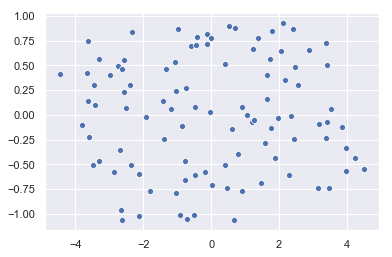

In [96]:
# Projecting the Data onto the new Orthongonal Eigenvectors
Z = X@V
sns.scatterplot(Z[:, 0], Z[:, 1])

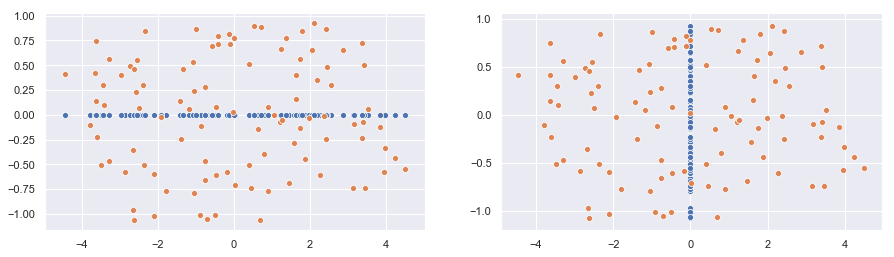

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
# Projected data on First Principal axis
sns.scatterplot(Z[:, 0], [0]*len(Z[:, 0]), ax=ax[0])
# Projected data on Second Principal axis
sns.scatterplot([0]*len(Z[:, 1]), Z[:, 1], ax=ax[1])

# Original Data
sns.scatterplot(Z[:, 0], Z[:, 1], ax=ax[0])
sns.scatterplot(Z[:, 0], Z[:, 1], ax=ax[1])

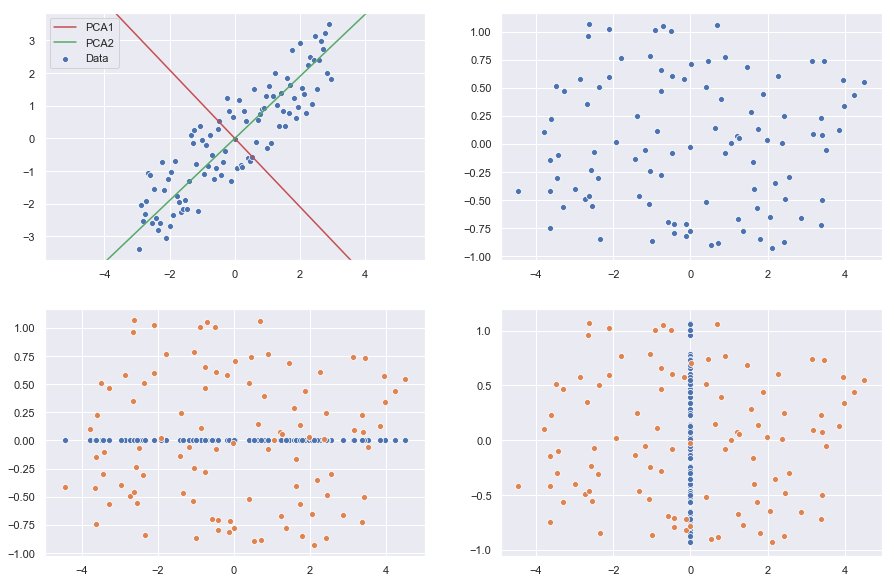

In [98]:
# Finding the PCA projections using the sklearn PCA function
X_pca = PCA().fit(X)
components = X_pca.components_
projections = X_pca.fit_transform(X)
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Original Data with the Components
sns.scatterplot(X[:, 0], X[:, 1], ax=ax[0, 0])
ax0_xlim = ax[0, 0].get_xlim()
ax0_ylim = ax[0, 0].get_ylim()
ax[0, 0].plot([-100, 100], [-100 * components[0, 0]/components[1, 0], 100 * components[0, 0]/components[1, 0]], 'r')
# Plotting the second eigenvector (Second Principal Eigen Vector)
ax[0, 0].plot([-100, 100], [-100 * components[0, 1]/components[1, 1], 100 * components[0, 1]/components[1, 1]], 'g')
ax[0, 0].axis('equal')
ax[0, 0].set_xlim(ax0_xlim)
ax[0, 0].set_ylim(ax0_ylim)
ax[0, 0].legend('PCA1,PCA2,Data'.split(','))

# Plot of the Rotated Data
sns.scatterplot(projections[:, 0], projections[:, 1], ax=ax[0, 1])

# Plotting thr projections
# Projected data on First Principal axis
sns.scatterplot(projections[:, 0], [0]*len(projections[:, 0]), ax=ax[1, 0])
# Projected data on Second Principal axis
sns.scatterplot([0]*len(projections[:, 1]), projections[:, 1], ax=ax[1, 1])

# Original Data
sns.scatterplot(projections[:, 0], projections[:, 1], ax=ax[1, 0])
sns.scatterplot(projections[:, 0], projections[:, 1], ax=ax[1, 1])

In [99]:
# Comparing the variance.
# Explained Variance is given by EigenValues of the first K Components over the Total Sum of Eigen Values
print('PCA Explained Variance:')
print(X_pca.explained_variance_)

print('PCA Explained Variance Ratio:')
print(X_pca.explained_variance_ratio_)

print('Singular Values:')
print(np.diagonal(S))

eigen_vals = np.diagonal(S)**2
print('Eigen Values:')
print(eigen_vals)

print('Explained Variance Ratio Using Eigen Values:')
print(np.array([eigen_vals[0]/sum(eigen_vals), eigen_vals[1]/sum(eigen_vals)]))

print('Explained Variance Ratio Accumulated:')
print(np.array([sum(eigen_vals[:1])/sum(eigen_vals), sum(eigen_vals[:2])/sum(eigen_vals)]))

PCA Explained Variance:
[5.36653725 0.32755163]
PCA Explained Variance Ratio:
[0.94247515 0.05752485]
Singular Values:
[23.1657878   5.72321266]
Eigen Values:
[536.65372459  32.7551631 ]
Explained Variance Ratio Using Eigen Values:
[0.94247515 0.05752485]
Explained Variance Ratio Accumulated:
[0.94247515 1.        ]
